In [9]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set(style='white')
plt.clf()

from sklearn.preprocessing import LabelEncoder # mempersiapkan data sebelum dilakukan permodelan
import warnings
warnings.filterwarnings('ignore')

from kmodes.kmodes import KModes # melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
from kmodes.kprototypes import KPrototypes  
  
import pickle # melakukan penyimpanan dari model yang akan di buat.
from pathlib import Path  


<Figure size 432x288 with 0 Axes>

In [8]:
df = pd.read_csv('Dataset - Mall_Customers.csv', index_col = 'CustomerID')
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})

df.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Eksplorasi Data Numerik: age, annual_income dan spending_score

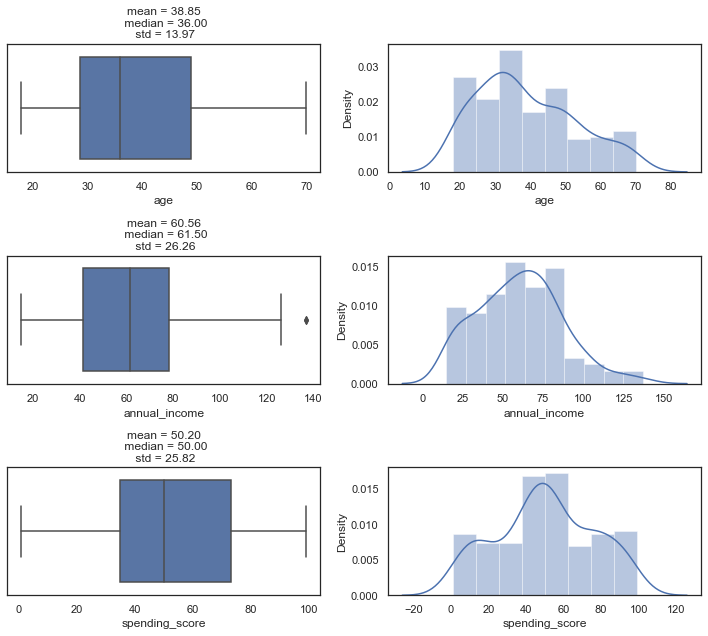

In [11]:
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(df[kol], ax = axs[i][0])
        sns.distplot(df[kol], ax = axs[i][1])   
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['age','annual_income', 'spending_score'] 
observasi_num(kolom_numerik) 

#### Eksplorasi Data Kategorikal: gender

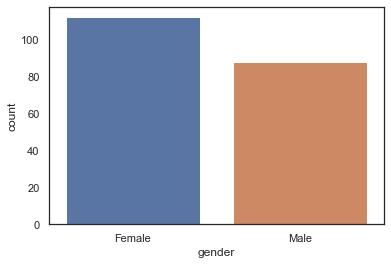

In [19]:
fig = figsize=(7,10)
sns.countplot(df['gender'], order = df['gender'].value_counts().index)  
plt.show()

#### Standarisasi Kolom Numerik (Feature Scalling)

In [20]:
from sklearn.preprocessing import StandardScaler  
   
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
print('-------------------------------------')  

# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
print('-------------------------------------')  

print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

         age  annual_income  spending_score
count  200.0          200.0           200.0
mean    38.8           60.6            50.2
std     14.0           26.3            25.8
min     18.0           15.0             1.0
25%     28.8           41.5            34.8
50%     36.0           61.5            50.0
75%     49.0           78.0            73.0
max     70.0          137.0            99.0
-------------------------------------
Contoh hasil standardisasi

                 age  annual_income  spending_score
CustomerID                                         
1          -1.424569      -1.738999       -0.434801
2          -1.281035      -1.738999        1.195704
3          -1.352802      -1.700830       -1.715913
4          -1.137502      -1.700830        1.040418
5          -0.563369      -1.662660       -0.395980
-------------------------------------
Statistik hasil standardisasi

         age  annual_income  spending_score
count  200.0          200.0 

#### Konversi label data kategorikal (label jd angka) | LABEL ENCODER

In [23]:
from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['gender']  
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
df_encode.head()



,gender
CustomerID,
1,1
2,1
3,0
4,0
5,0


#### Menggabungkan data (semua label sudah dalam angka)

In [24]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print(df_model.head())

df_model.to_csv('dataset untuk kmeans.csv')

            gender       age  annual_income  spending_score
CustomerID                                                 
1                1 -1.424569      -1.738999       -0.434801
2                1 -1.281035      -1.738999        1.195704
3                0 -1.352802      -1.700830       -1.715913
4                0 -1.137502      -1.700830        1.040418
5                0 -0.563369      -1.662660       -0.395980


# Algoritma K-Prototypes

#### Mencari jumlah kluster yang optimal

In [38]:
df_model = pd.read_csv('dataset untuk kmeans.csv', index_col='CustomerID')
df_model.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980


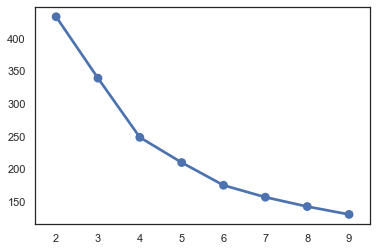

In [42]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range (2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=0)  
    kproto.fit_predict(df_model, categorical=[0])  
    cost [k]= kproto.cost_  
    
    
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

# k optimal = 4

#### Membuat Model

In [45]:
# Buatlah model Kprototypes dengan nilai k = 3 dan random state 75. Kemudian simpan hasilnya dalam bentuk pickle.

import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes(n_clusters=4, random_state = 75)
kproto = kproto.fit(df_model, categorical=[1])

#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))

#### Menggabungkan data (semua label sudah dalam angka)

In [52]:
# Tentukan cluster setiap pelanggan yang ada di dataset menggunakan model kproto yang sudah di buat sebelumnya. 
# Kemudian gabungkan hasil prediksi tersebut dengan data awal (df) sehingga kita mendapatkan data pelanggan beserta nama cluster nya.

# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[1])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
df_final['gender'].replace([0,1], ['Female','Male'],inplace=True)
df_final.head()


segmen pelanggan: [1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]



,gender,age,annual_income,spending_score,cluster
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,3
3,Female,20,16,6,1
4,Female,23,16,77,3
5,Female,31,17,40,1


#### Menampilkan Cluster Tiap Pelanggan

In [53]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5): # karena ada 5 cluster maka (0,5)  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i].head())



Pelanggan cluster: 0

            gender  age  annual_income  spending_score  cluster
CustomerID                                                     
125         Female   23             70              29        0
127           Male   43             71              35        0
129           Male   59             71              11        0
131           Male   47             71               9        0
133         Female   25             72              34        0

Pelanggan cluster: 1

            gender  age  annual_income  spending_score  cluster
CustomerID                                                     
1             Male   19             15              39        1
3           Female   20             16               6        1
5           Female   31             17              40        1
7           Female   35             18               6        1
9             Male   64             19               3        1

Pelanggan cluster: 2

            gender  age  annual_inc

# Visualisasi Hasil Clustering

#### Box Plot

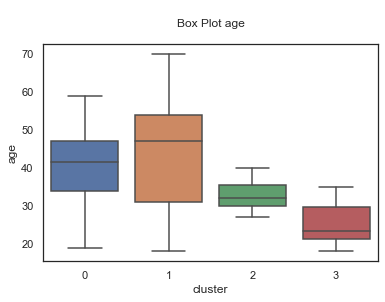

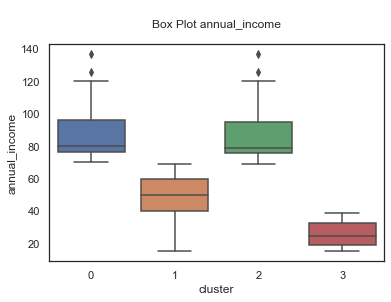

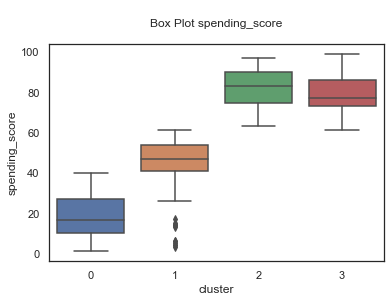

In [54]:
# Data Numerical
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 


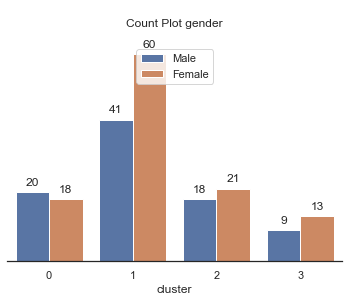

In [56]:
import matplotlib.pyplot as plt  
# Data Kategorikal  
kolom_categorical = ['gender']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


In [76]:
df_final.describe()

,age,annual_income,spending_score,cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.225000
std,13.969007,26.264721,25.823522,0.882194
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,1.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,2.000000
max,70.000000,137.000000,99.000000,3.000000


RESUME:

In [75]:
df_final[df_final['cluster'] == 1].describe()

,age,annual_income,spending_score,cluster
count,101.000000,101.000000,101.000000,101.0
mean,43.603960,48.168317,43.396040,1.0
std,15.819658,14.519001,14.707875,0.0
min,18.000000,15.000000,3.000000,1.0
25%,31.000000,40.000000,41.000000,1.0
50%,47.000000,50.000000,47.000000,1.0
75%,54.000000,60.000000,54.000000,1.0
max,70.000000,69.000000,61.000000,1.0


Cluster 0 = umurnya berkisar 19-59 tahun, dengan pendapatan bulanan berkisar 70 - 137, dan spending score berkisar 1 - 40

Cluster 1 = umurnya berkisar 18-70 tahun, dengan pendapatan bulanan berkisar 15 - 69, dan spending score berkisar 3 - 61

Cluster 2 = umurnya berkisar 27-40 tahun, dengan pendapatan bulanan berkisar 69 - 137, dan spending score berkisar 63-97

Cluster 3 = umurnya berkisar 18-35 tahun, dengan pendapatan bulanan berkisar 15-39, dan spending score berkisar 61-99


## CEK

In [82]:
# Data Baru  
data = [{  
    'CustomerID': '201' ,  
    'gender': 'Female' ,  
    'age': 25,  
    'annual_income': 5,  
    'spending_score': 10  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)  

  CustomerID  gender  age  annual_income  spending_score
0        201  Female   25              5              10


In [83]:
def data_preprocess(data):  
# Konversi Kategorikal data  
    kolom_kategorikal = ['gender']  
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['gender'] = df_encode['gender'].map({  
        'Male': 0,  
        'Female' : 1  
    })  
      
# Standardisasi Numerical Data  
    kolom_numerik = ['age','annual_income','spending_score']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['age'] = (df_std['age'] - 43.603960)/15.819658  
      
    ## Standardisasi Kolom Nilai Annual Income  
    df_std['annual_income'] = (df_std['annual_income'] - 48.168317)/14.519001 
      
    ## Standardisasi Kolom Nilai Spending Score  
    df_std['spending_score'] = (df_std['spending_score'] - 43.396040)/14.707875
    
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
print(new_df_model) 


   gender       age  annual_income  spending_score
0       1 -1.176003      -2.973229       -2.270623


#### Memanggil Model dan Melakukan Prediksi

In [84]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[1])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  


[1]
